## Data Loading

In [1]:
import os
import sys

import pandas as pd
sys.path.append(os.path.abspath("../common"))  # add path to common functions
from preprocess import getdfs, get_char_columns
from preprocess import one_hot_encode

In [2]:
train_df, valid_df = getdfs("emoticon")
y_train = train_df["label"]
y_test = valid_df["label"]

In [3]:
from preprocess import find_common_characters, remove_common_characters

In [4]:
strings = train_df['input_emoticon'].values
common_chars = find_common_characters(strings)

print("Common characters:", common_chars)

strings_after_removal = remove_common_characters(strings)
print("Strings after removal of common characters:", strings_after_removal)

Common characters: {'😑', '🛐', '🚼', '😣', '🙼', '😛', '🙯'}
Strings after removal of common characters: ['😻🙠😒', '😪🚅😹', '🚡🙲🛑', '🙐🙪🛆', '🚟🙋😹', '🚧🚜🙕', '🚥😬🚄', '🚡🚔🛓', '🛜😚🚠', '🙷😍😿', '🙚😍😸', '😯😻😹', '🙒🚙😬', '😿🚴😴', '🚂😦🙨', '🛝😉🙒', '😵🚃🚜', '🛆😘😊', '🚟😌😿', '🙧😉🚍', '🛓🚥😢', '🚵😊😩', '😬😠🛡', '🚜😰🚏', '🚗🙸🚌', '😓🚲😆', '🛌😺🙍', '😳🚦🙍', '🚏😏🙏', '😆😰🚯', '🙊😳😻', '😤🙍🙀', '😻🛔🚷', '🛈🛋\U0001f6db', '🚊🙸🛀', '🚒🙟😓', '😧🚰🙬', '🚳🛏😓', '🛍😨🛆', '🙬😗🙐', '🙈😱🙒', '🚄🚆🛖', '\U0001f6d8🙔🙏', '🚱🙊🛖', '🚮🛀🛀', '🙁🙽🛖', '🚵🚾🚣', '🚣🙇🚰', '😎🙏🚃', '🚿🚎🚯', '🙄🛎😁', '🙚😻🙅', '🚕🚯😓', '🙊😎😸', '😘🙍🙬', '😧🚰🙫', '🙷🙀😮', '🙳🙩🙟', '🚁🙦🛆', '🚴😊🙏', '😼😆🛄', '🛡🙳🙒', '😋😖🙕', '🙽😞🙩', '🚊🙐\U0001f6db', '🙙🚡🚄', '😿🙲🛇', '🚜🙤😶', '🛉🙨😒', '😯😚🚣', '🙾🚍🙅', '🚾🚀😓', '🚅\U0001f6db🙟', '😿😲🙏', '🚓🛌🙅', '🚍🚓😹', '😬🙶🛍', '🚦🛒\U0001f6db', '🚑😚🙩', '🚂🙎😊', '😧😚🛂', '🙫🚭🛍', '😚🙷😿', '😍🙈🚷', '🚀😊🛖', '😉😖😁', '😆🙑😋', '🛍😤🚾', '🙙😶🙩', '🛔🚄🛏', '🚚🛌🙩', '😚🛉🚿', '😳🙕😩', '🚍🚛😪', '🙄🙱🛓', '🙑🙨😕', '🛄🙗🚇', '😺🚿🙅', '😼🚰🛆', '😸🚧🛅', '🚑😶🚣', '🚽🛎\U0001f6db', '🙾🚏😕', '🛄🚩🚁', '😠😦😅', '🛈🙏🛓', '🚣🙜🛡', '🙹😦🛓', '🚶🚦😴', '🛌🚗😆', '😚😤😴', '😏🙬😋', '🙘🚇🚷', '🙒😷🛟', '😰😉🙕', '😾🛌😥', '🙳\U0001f6d8🚰', '😔🛜🛖', '🛎😊😻', '🙍🚲😸

In [5]:
# Create one-hot encoding of the dataset

train_df['input_emoticon'] = strings_after_removal
valid_df['input_emoticon'] = remove_common_characters(valid_df['input_emoticon'].values)


In [6]:
train_df.head()

,input_emoticon,label
0,😻🙠😒,0
1,😪🚅😹,0
2,🚡🙲🛑,0
3,🙐🙪🛆,1
4,🚟🙋😹,1


In [7]:
train_df = get_char_columns(train_df)
valid_df = get_char_columns(valid_df)

In [8]:
train_df.head()

,c_1,c_2,c_3,label
0,😻,🙠,😒,0
1,😪,🚅,😹,0
2,🚡,🙲,🛑,0
3,🙐,🙪,🛆,1
4,🚟,🙋,😹,1


## Emoji to Text to BERT Embedding

In [9]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [10]:
def text2embed(text) :
    inputs = tokenizer(text, return_tensors='pt')
    
    with torch.no_grad():
        outputs = model(**inputs)
        
    embeddings = outputs.last_hidden_state
    sentence_embedding = torch.mean(embeddings, dim=1)

    return sentence_embedding.numpy().reshape(-1)

In [11]:
texts = []
for col in train_df.columns[:-1] :
    for text in train_df[col].values :
        texts.append(text)
texts = list(set(texts))

In [12]:
dict_text2bed = {f'{text}' : text2embed(text) for text in texts}

In [13]:
import numpy as np

def embed_df(df : pd.DataFrame, embedding_dim : int = 768, num_columns: int = 13)-> pd.DataFrame :

    # Initialize a list to store rows of combined embeddings
    combined_embeddings = []

    # Iterate over each row in the dataframe
    for idx, row in df.iterrows():
        row_embeddings = []
        
        # Iterate over the 13 columns and get the embedding for each
        for col in df.columns :
            if col == "label" :
                continue
            column_text = row[col]
            
            # If the text is not empty, fetch its embedding, else use a zero vector
            if column_text != '':
                embedding = dict_text2bed.get(column_text, np.zeros(embedding_dim))
            else:
                embedding = np.zeros(embedding_dim)
            
            # Append the embedding to the row list
            row_embeddings.append(embedding)
        
        # Concatenate the embeddings for the row
        combined_embeddings.append(np.hstack(row_embeddings))

    # Convert the list of rows into a NumPy array
    X = np.vstack(combined_embeddings)
    
    return X



In [14]:
x_train = embed_df(train_df)
y_train = train_df['label']

x_valid = embed_df(valid_df)
y_valid = valid_df['label']

## Models and Evalution

In [15]:
from models import predict_xgboost, predict_mlp, predict_logistic_regression, predict_random_forest, predict_svc
from evaluate import evaluate_predictions

### Grid Search with LR

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Best Parameters: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.5050847457627119
==========Logistic Regression Tuned==========
              precision    recall  f1-score   support

     Class 0       0.52      1.00      0.68       252
     Class 1       0.00      0.00      0.00       237

    accuracy                           0.52       489
   macro avg       0.26      0.50      0.34       489
weighted avg       0.27      0.52      0.35       489

Accuracy is 0.5153374233128835
==========Logistic Regression Tuned==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

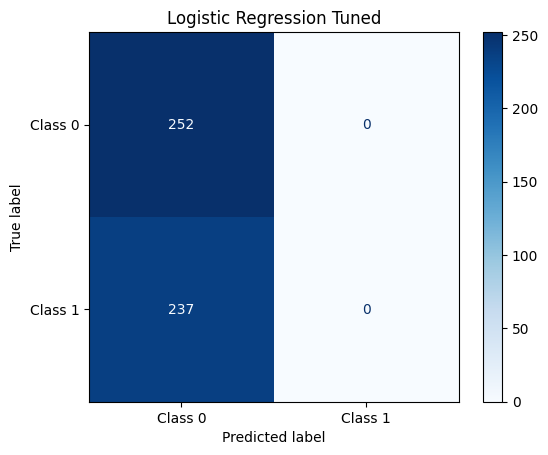

In [16]:
y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid, grid_search=True)
evaluate_predictions(y_test, y_pred_lr, "Logistic Regression Tuned" )

In [17]:

from sklearn.metrics import accuracy_score

model_columns = ['Random Forest', 'XGBoost', 'Logistic Regression', 'MLP', 'SVC']
size_colums = ['0.2', '0.4', '0.6', '0.8', '1.0']

In [18]:
results_df = pd.DataFrame(columns=model_columns, index=size_colums)

for size in [1.0, 0.8, 0.6, 0.4, 0.2]:
    curr_train_df = train_df.copy().iloc[:int(size * len(train_df))]
    curr_valid_df = valid_df.copy().iloc[:int(size * len(valid_df))]
    
    x_train, x_valid, y_train, y_valid = one_hot_encode(curr_train_df, curr_valid_df)

    y_pred_rf = predict_random_forest(x_train, y_train, x_valid)

    y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)

    y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)

    y_pred_mlp = predict_mlp(x_train, y_train, x_valid, hidden_layer_sizes=(16,), max_iter=1000)

    y_pred_svc = predict_svc(x_train, y_train, x_valid, max_iter = 10000)
    
    results_df.loc[str(size), 'Random Forest'] = accuracy_score(y_valid, y_pred_rf)
    results_df.loc[str(size), 'XGBoost'] = accuracy_score(y_valid, y_pred_xgb)
    results_df.loc[str(size), 'Logistic Regression'] = accuracy_score(y_valid, y_pred_lr)
    results_df.loc[str(size), 'MLP'] = accuracy_score(y_valid, y_pred_mlp)
    results_df.loc[str(size), 'SVC'] = accuracy_score(y_valid, y_pred_svc)
    

Number of parameters in the MLP model:  8049
Number of parameters in the MLP model:  8049
Number of parameters in the MLP model:  8049
Number of parameters in the MLP model:  8049
Number of parameters in the MLP model:  8049


In [19]:
print(results_df)

    Random Forest   XGBoost Logistic Regression       MLP       SVC
0.2      0.876289  0.876289            0.917526  0.907216  0.886598
0.4      0.933333  0.923077             0.94359  0.933333  0.923077
0.6      0.928328  0.914676            0.952218  0.955631   0.90785
0.8      0.913043  0.907928            0.953964  0.966752  0.918159
1.0      0.916155   0.92229            0.948875  0.965235  0.940695


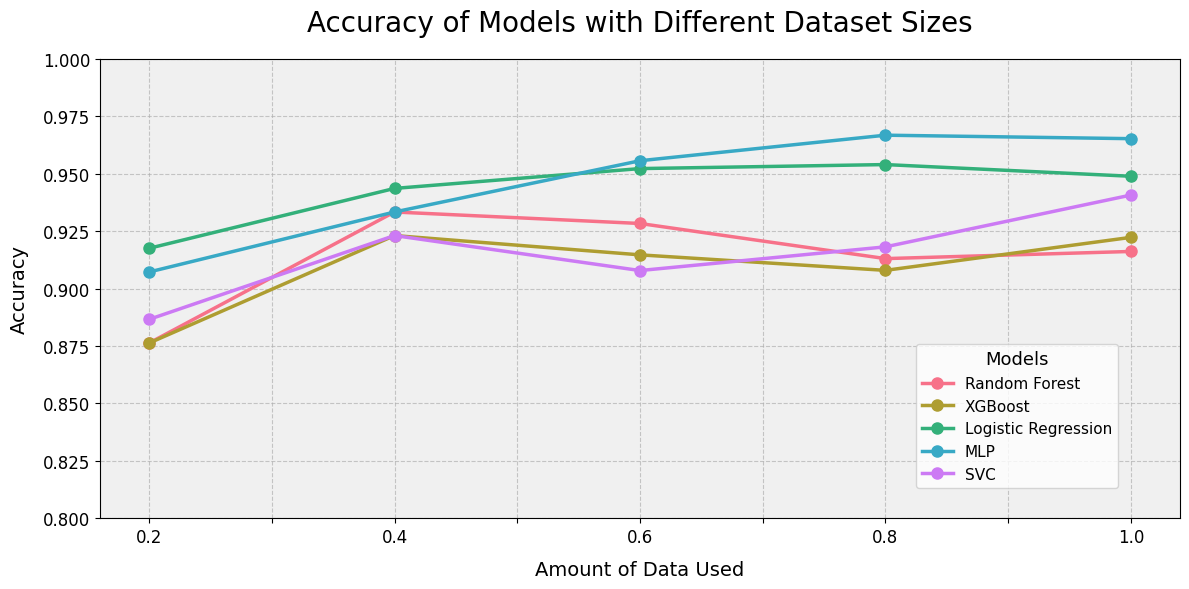

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data with a color palette
colors = sns.color_palette("husl", n_colors=len(results_df.columns))
results_df.plot(ax=ax, linewidth=2.5, marker='o', markersize=8, color=colors)

# Customize the plot
plt.ylim(0.8, 1)
plt.title('Accuracy of Models with Different Dataset Sizes', fontsize=20, pad=20)
plt.xlabel('Amount of Data Used', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)

# Customize the grid
ax.grid(True, linestyle='--', alpha=0.7)

# Customize the legend
ax.legend(title='Models', title_fontsize='13', fontsize='11', loc='lower right', bbox_to_anchor=(0.95, 0.05))

# Customize the tick labels
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a subtle background color
ax.set_facecolor('#f0f0f0')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Plot for MLP

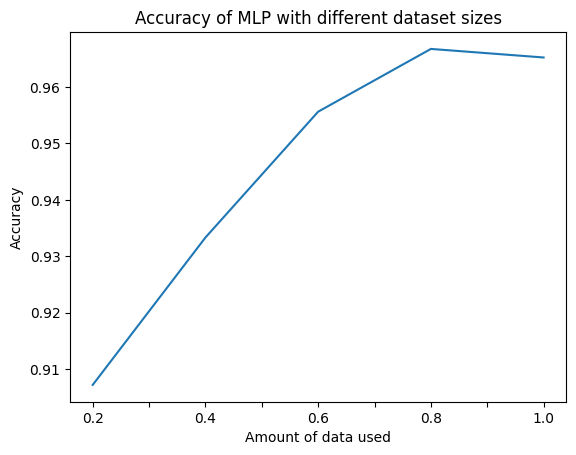

In [21]:
results_df.MLP.plot()
plt.title('Accuracy of MLP with different dataset sizes')
plt.xlabel('Amount of data used')
plt.ylabel('Accuracy')

plt.show()

### Logistic regression seems to perform equally (if not better) with less data
### Performance greatly drop from 0.4 to 0.2